# **Generating Protein Structure Networks from PDB files Using the RING server**
---

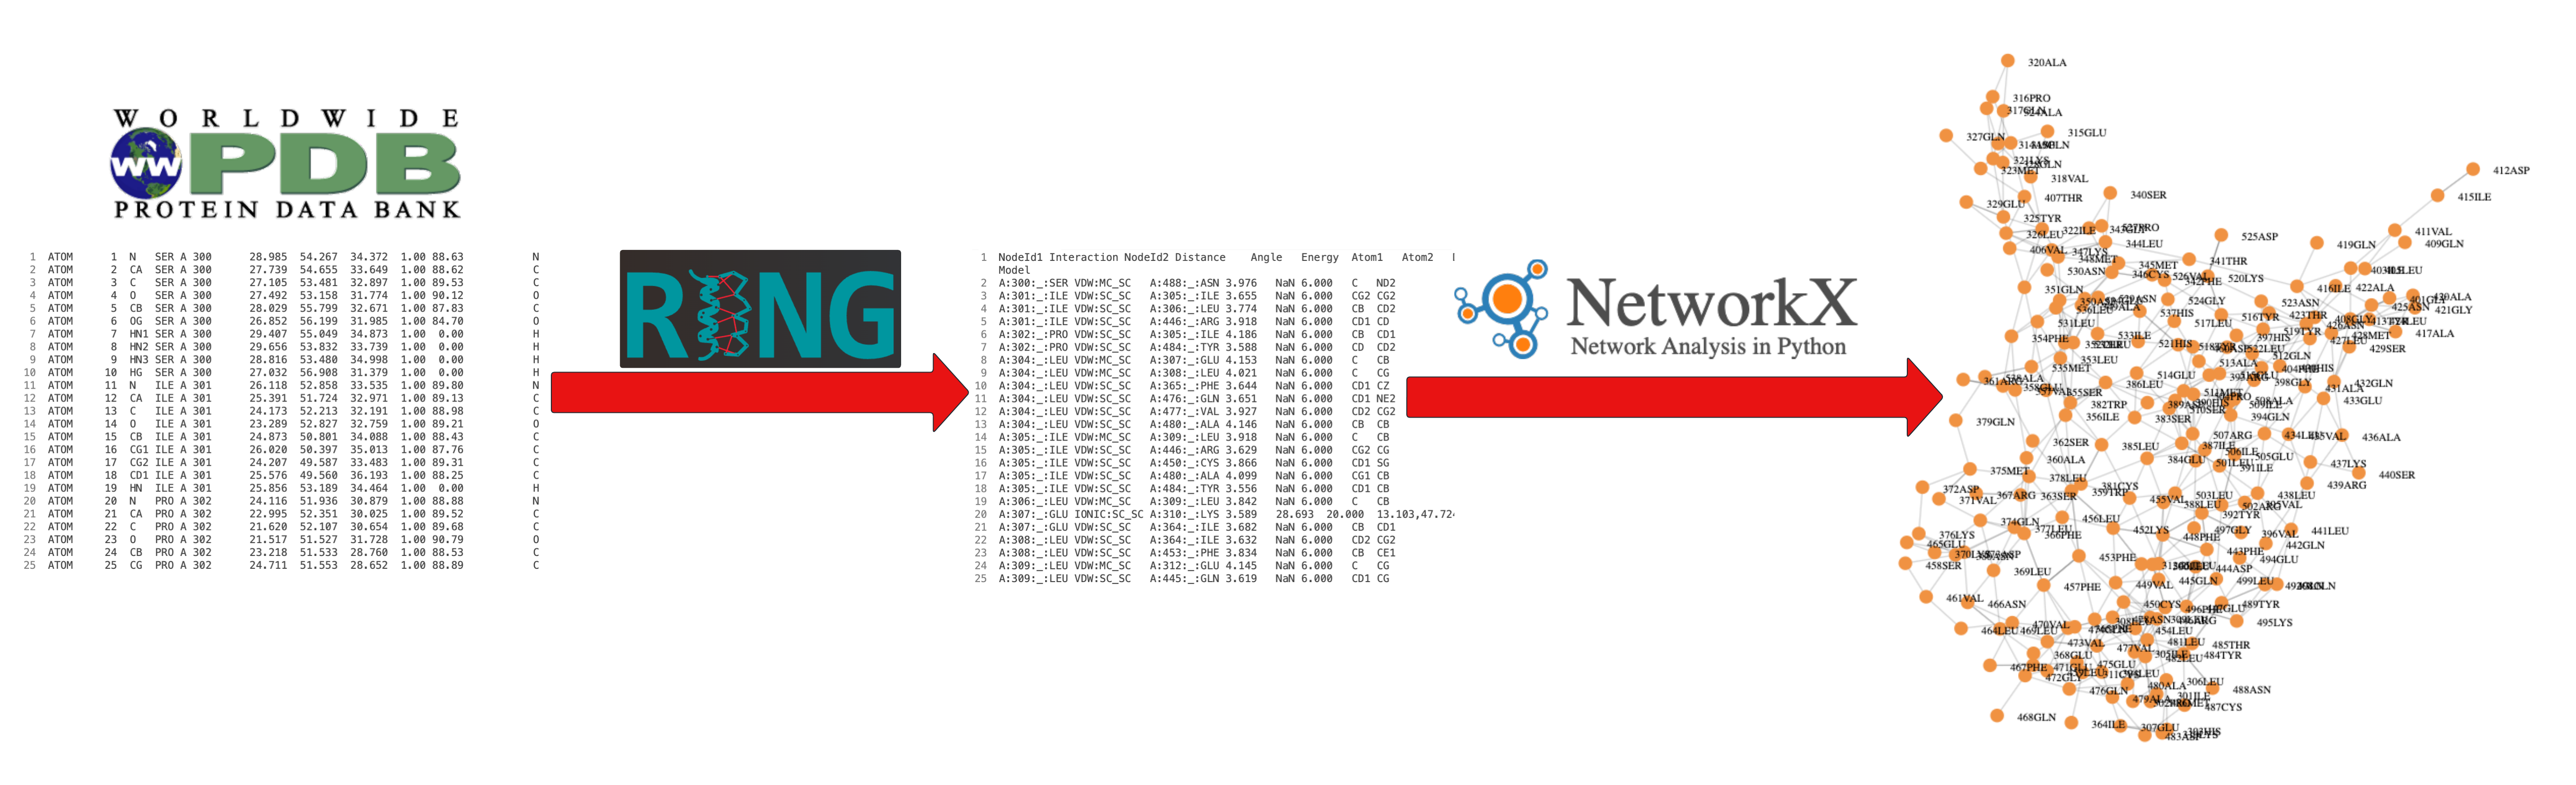

<font size='4'>The method employed in this project for generating protein structure networks begins with a folder or list of relevant Protein Data Bank (PDB) structure files. A PDB structure file is a standard file format used to represent three-dimensional molecular structures, primarily of proteins and nucleic acids. It contains detailed information about the atomic coordinates, chemical components, and molecular interactions within the structure. PDB structure files are crucial for understanding the molecular architecture and interactions of biological molecules and are widely used in structural biology, bioinformatics, and drug discovery research. They adhere to a standardized format maintained by the [Worldwide Protein Data Bank](https://www.rcsb.org/) to ensure compatibility and interoperability across various computational tools and databases. Here's what a typical PDB structure file contains:</font>

In [38]:
import pandas as pd
from Bio.PDB import PDBParser

def pdb_to_dataframe(pdb_file):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('structure', pdb_file)
    
    data = []
    for model in structure:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    data.append([
                        model.id,
                        chain.id,
                        residue.id[1],
                        residue.resname,
                        atom.name,
                        atom.coord[0],
                        atom.coord[1],
                        atom.coord[2],
                        atom.occupancy,
                        atom.bfactor
                    ])
    
    columns = [
        'Model', 'Chain', 'Residue_Number', 'Residue_Name',
        'Atom_Name', 'X', 'Y', 'Z', 'Occupancy', 'B_Factor'
    ]
    
    df = pd.DataFrame(data, columns=columns)
    return df


pdb_file = 'db/4177_4pld.pdb'
pdb_df = pdb_to_dataframe(pdb_file)
pdb_df.head(50)

,Model,Chain,Residue_Number,Residue_Name,Atom_Name,X,Y,Z,Occupancy,B_Factor
0,0,A,1,ALA,N,22.663000,-21.556000,-34.528000,1.0,0.0
1,0,A,1,ALA,CA,23.313000,-20.777000,-35.605000,1.0,0.0
2,0,A,1,ALA,C,24.813000,-20.917000,-35.402000,1.0,0.0
3,0,A,1,ALA,O,25.242001,-22.002001,-35.042999,1.0,0.0
4,0,A,1,ALA,CB,22.816000,-19.318001,-35.616001,1.0,0.0
5,0,A,1,ALA,1H,22.052000,-21.101000,-33.881001,1.0,0.0
6,0,A,1,ALA,2H,22.056999,-22.318001,-34.757999,1.0,0.0
7,0,A,1,ALA,3H,23.221001,-22.040001,-33.854000,1.0,0.0
8,0,A,1,ALA,HA,23.073000,-21.235001,-36.563999,1.0,0.0
9,0,A,1,ALA,1HB,23.312000,-18.771999,-36.417999,1.0,0.0


<font size='4'>The [Residue Interaction Network Generator](https://ring.biocomputingup.it/) (RING) server is a computational tool designed to analyze and visualize residue interactions in proteins. It uses protein structure data to create residue interaction networks (RINs), which represent the network of contacts and interactions between amino acid residues within a protein structure.</font>

## **Key Features and Uses:**

#### 1. **Network Visualization:** RING server visualizes residue interactions in a protein as a network, where nodes represent residues and edges represent interactions (e.g., hydrogen bonds, van der Waals contacts).

#### 2. **Interaction Analysis:** It quantifies and categorizes different types of residue interactions within the protein structure.

#### 3. **Comparative Analysis:** It allows for the comparison of residue interaction networks between different protein structures or between different conformations of the same protein.

#### 4. **Dynamic Analysis:** It can analyze and visualize changes in residue interactions in molecular dynamics simulations or upon ligand binding.

#### 5. **Structural Bioinformatics:** The server provides insights into the structural basis of protein function, stability, and dynamics.

#### 6. **Predictive Modeling:** It can aid in predicting the effects of mutations or protein engineering on residue interactions and stability.

## **Why is it Useful for Research?**

<font size='4'>Protein structure networks are essential tools for researchers because they provide a detailed map of interactions between amino acids within a protein. This information is fundamental for understanding protein function, including enzymatic activity, molecular recognition, and signaling pathways. These networks also aid in predicting important protein properties such as stability, flexibility, and solubility, which are crucial for protein engineering and drug design. By identifying key residues and interactions, researchers can pinpoint critical sites that stabilize the protein structure or mediate specific functional roles, guiding both experimental studies and computational predictions. Comparative analysis of protein structures helps to reveal evolutionary relationships, structural motifs, and functional similarities or differences among proteins. Additionally, protein structure networks facilitate structure-based drug design by identifying potential targets for therapeutic agents. They also support molecular dynamics and simulation studies, enabling researchers to predict how mutations or environmental changes affect protein stability and function. Moreover, these networks allow for the systematic analysis of protein-protein interactions, elucidating how proteins form complexes and cooperate in biological processes. In the field of structural bioinformatics, protein structure networks serve as a foundation for developing algorithms and tools for protein structure prediction, analysis, and visualization, thereby advancing research in molecular biology and biophysics.</font>

<font size='4'>In summary, the RING server is a powerful tool in structural bioinformatics that facilitates the analysis, visualization, and comparison of residue interaction networks within protein structures, contributing significantly to research in molecular biology, biophysics, and drug discovery.</font>

In [8]:
import pandas as pd

# Specify the path to your tab-separated file
tsv_file = 'db/db_results/db_ring_results/4177_4pld_db.cif_ringEdges'

# Read the tab-separated file into a DataFrame
df = pd.read_csv(tsv_file, sep='\t')
df

,NodeId1,Interaction,NodeId2,Distance,Angle,Energy,Atom1,Atom2,Donor,Positive,Cation,Orientation,Model
0,A:2:_:SER,VDW:MC_SC,A:190:_:ASN,3.736,NaN,6.0,C,ND2,NaN,NaN,NaN,NaN,1
1,A:3:_:ILE,VDW:SC_SC,A:7:_:ILE,3.518,NaN,6.0,CG2,CG2,NaN,NaN,NaN,NaN,1
2,A:3:_:ILE,VDW:SC_SC,A:8:_:LEU,3.928,NaN,6.0,CB,CD2,NaN,NaN,NaN,NaN,1
3,A:3:_:ILE,VDW:SC_SC,A:148:_:ARG,3.995,NaN,6.0,CD1,CD,NaN,NaN,NaN,NaN,1
4,A:4:_:PRO,HBOND:MC_MC,A:7:_:ILE,3.342,54.781,17.0,O,N,A:7:_:ILE,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,A:235:_:ILE,HBOND:MC_MC,A:239:_:HIS,2.909,17.111,17.0,O,N,A:239:_:HIS,NaN,NaN,NaN,1
730,A:235:_:ILE,HBOND:MC_MC,A:240:_:ALA,4.803,29.006,17.0,O,N,A:240:_:ALA,NaN,NaN,NaN,1
731,A:236:_:GLU,HBOND:MC_MC,A:239:_:HIS,3.361,47.263,17.0,O,N,A:239:_:HIS,NaN,NaN,NaN,1
732,A:236:_:GLU,HBOND:MC_MC,A:240:_:ALA,2.792,23.632,17.0,O,N,A:240:_:ALA,NaN,NaN,NaN,1


---
# **Visualizing 4177_4pld.pdb using p3Dmol, and Networkx and Plotly:**
---

# Preliminary data preprocessing:

In [9]:
import pandas as pd
from Bio.PDB import PDBParser

def pdb_to_dataframe(pdb_file):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('structure', pdb_file)
    
    data = []
    for model in structure:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    data.append([
                        model.id,
                        chain.id,
                        residue.id[1],
                        residue.resname,
                        atom.name,
                        atom.coord[0],
                        atom.coord[1],
                        atom.coord[2],
                        atom.occupancy,
                        atom.bfactor
                    ])
    
    columns = [
        'Model', 'Chain', 'Residue_Number', 'Residue_Name',
        'Atom_Name', 'X', 'Y', 'Z', 'Occupancy', 'B_Factor'
    ]
    
    df = pd.DataFrame(data, columns=columns)
    return df


pdb_file = 'db/4177_4pld.pdb'
pdb_df = pdb_to_dataframe(pdb_file)
pdb_df

,Model,Chain,Residue_Number,Residue_Name,Atom_Name,X,Y,Z,Occupancy,B_Factor
0,0,A,1,ALA,N,22.663000,-21.556000,-34.528000,1.0,0.0
1,0,A,1,ALA,CA,23.313000,-20.777000,-35.605000,1.0,0.0
2,0,A,1,ALA,C,24.813000,-20.917000,-35.402000,1.0,0.0
3,0,A,1,ALA,O,25.242001,-22.002001,-35.042999,1.0,0.0
4,0,A,1,ALA,CB,22.816000,-19.318001,-35.616001,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3965,0,X,1,DUM,H35,40.752998,-9.544000,-1.957000,1.0,20.0
3966,0,X,1,DUM,H36,40.243999,-12.309000,-2.227000,1.0,20.0
3967,0,X,1,DUM,H29,37.521000,-8.755000,0.152000,1.0,20.0
3968,0,X,1,DUM,H30,36.234001,-9.580000,-0.783000,1.0,20.0


In [1]:
import pandas as pd

# Specify the path to your tab-separated file
tsv_file = 'db/db_results/db_ring_results/4177_4pld_db.cif_ringEdges'

# Read the tab-separated file into a DataFrame
df = pd.read_csv(tsv_file, sep='\t')
df

,NodeId1,Interaction,NodeId2,Distance,Angle,Energy,Atom1,Atom2,Donor,Positive,Cation,Orientation,Model
0,A:2:_:SER,VDW:MC_SC,A:190:_:ASN,3.736,NaN,6.0,C,ND2,NaN,NaN,NaN,NaN,1
1,A:3:_:ILE,VDW:SC_SC,A:7:_:ILE,3.518,NaN,6.0,CG2,CG2,NaN,NaN,NaN,NaN,1
2,A:3:_:ILE,VDW:SC_SC,A:8:_:LEU,3.928,NaN,6.0,CB,CD2,NaN,NaN,NaN,NaN,1
3,A:3:_:ILE,VDW:SC_SC,A:148:_:ARG,3.995,NaN,6.0,CD1,CD,NaN,NaN,NaN,NaN,1
4,A:4:_:PRO,HBOND:MC_MC,A:7:_:ILE,3.342,54.781,17.0,O,N,A:7:_:ILE,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,A:235:_:ILE,HBOND:MC_MC,A:239:_:HIS,2.909,17.111,17.0,O,N,A:239:_:HIS,NaN,NaN,NaN,1
730,A:235:_:ILE,HBOND:MC_MC,A:240:_:ALA,4.803,29.006,17.0,O,N,A:240:_:ALA,NaN,NaN,NaN,1
731,A:236:_:GLU,HBOND:MC_MC,A:239:_:HIS,3.361,47.263,17.0,O,N,A:239:_:HIS,NaN,NaN,NaN,1
732,A:236:_:GLU,HBOND:MC_MC,A:240:_:ALA,2.792,23.632,17.0,O,N,A:240:_:ALA,NaN,NaN,NaN,1


In [10]:
pdb_4pld_df = pdb_df[(pdb_df['Chain'] == 'A') & (pdb_df['Atom_Name'] == 'CA')]
pdb_4pld_df

,Model,Chain,Residue_Number,Residue_Name,Atom_Name,X,Y,Z,Occupancy,B_Factor
1,0,A,1,ALA,CA,23.313000,-20.777000,-35.605000,1.0,0.0
13,0,A,2,SER,CA,26.855000,-19.709999,-34.816002,1.0,0.0
24,0,A,3,ILE,CA,25.399000,-20.039000,-31.246000,1.0,0.0
43,0,A,4,PRO,CA,23.870001,-23.413000,-30.037001,1.0,0.0
57,0,A,5,HIS,CA,20.237000,-23.377001,-28.805000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3831,0,A,236,GLU,CA,29.551001,-16.045000,6.685000,1.0,0.0
3846,0,A,237,MET,CA,30.198999,-17.992001,3.414000,1.0,0.0
3863,0,A,238,LEU,CA,33.733002,-18.896999,4.762000,1.0,0.0
3882,0,A,239,HIS,CA,32.255001,-20.274000,8.036000,1.0,0.0


In [11]:
filtered_df = df[df['NodeId1'].str.contains('^A:') & (df['NodeId2'].str.contains('^A:'))].copy()
filtered_df['source'] = filtered_df['NodeId1'].str.extract(r'(\d+)').astype(int)
filtered_df['target'] = filtered_df['NodeId2'].str.extract(r'(\d+)').astype(int)
ring_4pld_df = filtered_df[['source','target']]
ring_4pld_df

,source,target
0,2,190
1,3,7
2,3,8
3,3,148
4,4,7
...,...,...
729,235,239
730,235,240
731,236,239
732,236,240


In [12]:
# Merge df1 and df2 on 'ID' column
merged_df = pd.merge(ring_4pld_df, pdb_4pld_df[['Residue_Number', 'X', 'Y', 'Z']], left_on='source', right_on='Residue_Number', how='left')
merged_df.rename(columns={'X': 'X1','Y': 'Y1','Z': 'Z1'}, inplace=True)

merged_df2 = pd.merge(merged_df, pdb_4pld_df[['Residue_Number', 'X', 'Y', 'Z']], left_on='target', right_on='Residue_Number', how='left')
merged_df2.rename(columns={'X': 'X2','Y': 'Y2','Z': 'Z2'}, inplace=True)

edgelist_4pld_coords = merged_df2[['source','target','X1','Y1','Z1','X2','Y2','Z2']]
edgelist_4pld_coords

,source,target,X1,Y1,Z1,X2,Y2,Z2
0,2,190,26.855000,-19.709999,-34.816002,33.203999,-20.660999,-34.186001
1,3,7,25.399000,-20.039000,-31.246000,23.653999,-21.357000,-24.958000
2,3,8,25.399000,-20.039000,-31.246000,20.930000,-19.032000,-26.357000
3,3,148,25.399000,-20.039000,-31.246000,29.115999,-17.598000,-24.773001
4,4,7,23.870001,-23.413000,-30.037001,23.653999,-21.357000,-24.958000
...,...,...,...,...,...,...,...,...
702,235,239,33.014999,-14.415000,6.405000,32.255001,-20.274000,8.036000
703,235,240,33.014999,-14.415000,6.405000,29.410000,-21.670000,5.847000
704,236,239,29.551001,-16.045000,6.685000,32.255001,-20.274000,8.036000
705,236,240,29.551001,-16.045000,6.685000,29.410000,-21.670000,5.847000


# Visualizing 4177_4pld.pdb using Networkx and Plotly:

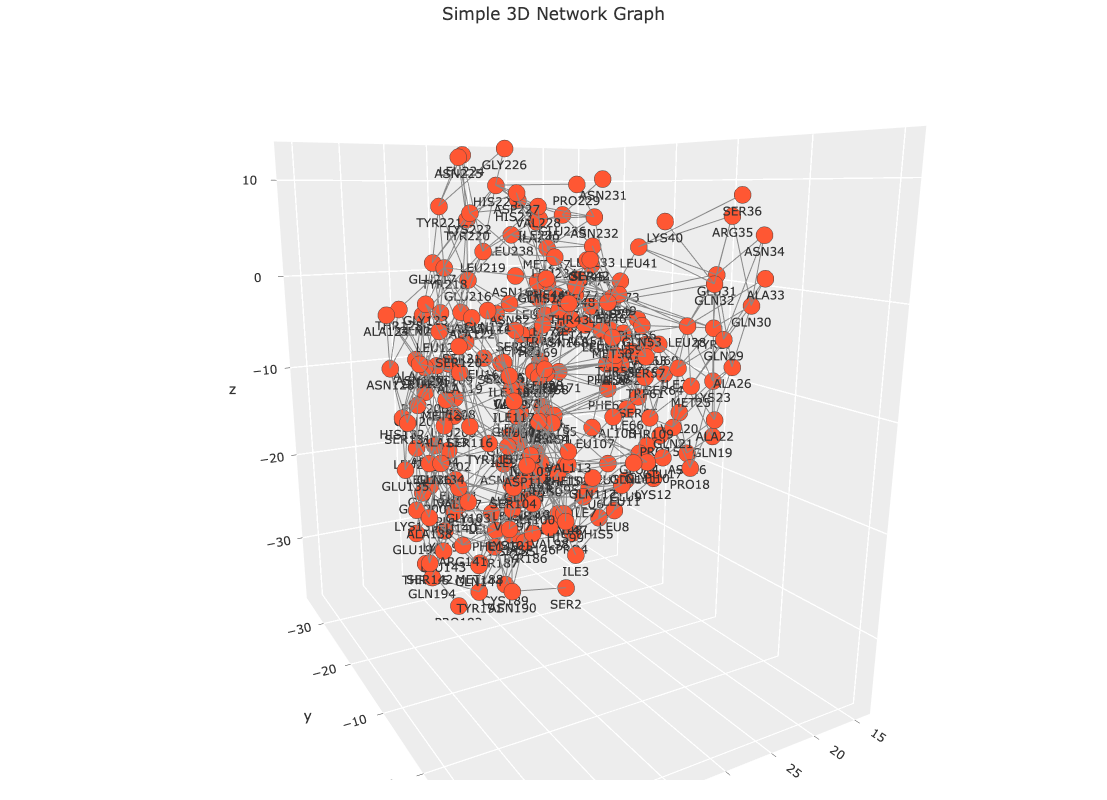

In [34]:
import plotly.graph_objs as go
import networkx as nx
from plotly.offline import init_notebook_mode


# Initialize the graph
G = nx.Graph()
G.add_edges_from(edgelist_4pld_coords[['source', 'target']].itertuples(index=False, name=None))

# Extract edge positions from the DataFrame
edge_x = []
edge_y = []
edge_z = []

for i, row in edgelist_4pld_coords.iterrows():
    edge_x.extend([row['X1'], row['X2'], None])
    edge_y.extend([row['Y1'], row['Y2'], None])
    edge_z.extend([row['Z1'], row['Z2'], None])

# Extract unique node positions
nodes = pd.concat([edgelist_4pld_coords[['source', 'X1', 'Y1', 'Z1']].rename(columns={'source': 'node', 'X1': 'x', 'Y1': 'y', 'Z1': 'z'}),
                   edgelist_4pld_coords[['target', 'X2', 'Y2', 'Z2']].rename(columns={'target': 'node', 'X2': 'x', 'Y2': 'y', 'Z2': 'z'})])

nodes = nodes.drop_duplicates('node').set_index('node')

node_x = nodes['x'].tolist()
node_y = nodes['y'].tolist()
node_z = nodes['z'].tolist()

# Create edge trace
edge_trace = go.Scatter3d(
    x=edge_x,
    y=edge_y,
    z=edge_z,
    line=dict(width=2, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Create node trace
node_trace = go.Scatter3d(
    x=node_x,
    y=node_y,
    z=node_z,
    mode='markers+text',
    text = [f'{residue}{node}' for node, residue in zip(nodes.index, matching_residue_names)],
    textposition="bottom center",
    hoverinfo='text',
    marker=dict(
        showscale=False,
        color='#FF5733',
        size=10,
        line=dict(width=2)
    )
)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Simple 3D Network Graph',
                    showlegend=False,
                    width=1000,  
                    height=800,  
                    margin=dict(b=20, l=5, r=5, t=40),
                ))

fig.update_layout(template='ggplot2',
                 scene=dict(
                    xaxis=dict(showgrid=True, gridcolor='rgba(200, 200, 200, 0.25)'),  # 50% transparent grid
                    yaxis=dict(showgrid=True, gridcolor='rgba(200, 200, 200, 0.25)'),  # 50% transparent grid
                    zaxis=dict(showgrid=True, gridcolor='rgba(200, 200, 200, 0.25)')   # 50% transparent grid
        )
)

# Display the figure
fig.show()

In [ ]:
pdb_4pld_df.set_index('Residue_Number', inplace=True)

# Use .loc to match indices and get the corresponding 'Residue_Name'
matching_residue_names = pdb_4pld_df.loc[nodes.index, 'Residue_Name']

# Reset index if you want to keep the original DataFrame structure
pdb_4pld_df.reset_index(inplace=True)

# Print or return the result
print(matching_residue_names)

In [ ]:
text = [f'{residue}{node}' for node, residue in zip(nodes.index, matching_residue_names)]
print(text)